In [146]:
# from https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
import warnings
warnings.filterwarnings('ignore')

In [147]:
# https://keras.io/datasets/#mnist-database-of-handwritten-digits
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [148]:
import numpy as np

# preprocessing: convert from grayscale to black and white
for val in np.nditer(x_train, op_flags=['readwrite']):
    if val > 50:
        val[...] = 255
    else:
        val[...] = 0

'Label: 5'

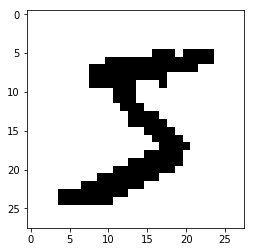

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow([255 - i for i in x_train[0]], cmap='gray')
"Label: {}".format(y_train[0])

In [150]:
import keras

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

# https://keras.io/getting-started/sequential-model-guide/
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10, dtype="uint8")
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10, dtype="uint8")

print(y_train[0])
y_train_cat[0]

5


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [155]:
from keras import Sequential
from keras import layers

# Dense (500, linear)
# Dense (100, linear)
# Dense (10, softmax)
# [0.6122526635818183, 0.8727999925613403]
model = Sequential()
model.add(layers.Dense(250, activation='linear', input_dim=784))
model.add(layers.Dense(60, activation='linear'))
model.add(layers.Dense(30, activation='linear'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
model.fit(x_train, y_train_cat, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 14.8179 - accuracy: 0.8036
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 2.3255 - accuracy: 0.8138
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 1.3122 - accuracy: 0.8235
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.7863 - accuracy: 0.8403
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.5909 - accuracy: 0.8542
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.5119 - accuracy: 0.8655
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.4666 - accuracy: 0.8756
Epoch 8/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.4319 - accuracy: 0.8817
Epoch 9/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.4169 - accuracy: 0.8828
Epoch 10/10
60000/60000 [=============================

In [157]:
scores = model.evaluate(x_test, y_test_cat)
scores

10000/10000 [==============================] - 0s 40us/step


[0.3602799182653427, 0.8934000134468079]

<Container object of 10 artists>

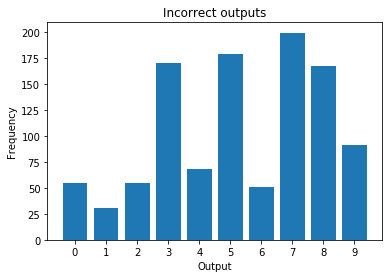

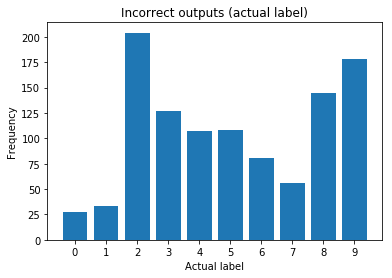

In [158]:
predictions = model.predict_classes(x_test)
# ["Output: {} - Label: {}".format(predictions[i], y_test[i]) for i in range(len(predictions)) if predictions[i] != y_test[i]]

# https://stackoverflow.com/questions/4535374/initialize-a-numpy-array
nums = np.arange(0, 10)
wrong_out_dist = np.zeros((10,))
wrong_out_label_dist = np.zeros((10,))

for i in range(len(predictions)):
    if predictions[i] != y_test[i]:
        wrong_out_dist[predictions[i]] += 1
        wrong_out_label_dist[y_test[i]] += 1

# https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data
# https://www.programcreek.com/python/example/56587/matplotlib.pyplot.title
plt.title("Incorrect outputs")
plt.xlabel("Output")
plt.ylabel("Frequency")
plt.bar(nums, wrong_out_dist, tick_label=nums)

plt.figure()
plt.title("Incorrect outputs (actual label)")
plt.xlabel("Actual label")
plt.ylabel("Frequency")
plt.bar(nums, wrong_out_label_dist, tick_label=nums)